# 2017 DFW Airport Flights Classification

By Mohamed Elsaied, Michael Xu


1.Buisness Understanding

  Traveling by flights have been a common type of transportation; however, delays has been one of the most concerned problem with passengers. Our nearest airport, Dallas-Fort Worth International Airport (DFW), is the second largest airport in the U.S. both by size of the land and the airline hub, and it is the fourth busiest U.S. airport based on the number of passengers enplaned in 2017. However, DFW could not make itself a pioneer at the on-time ratio. According to Statista.com, DFW was ranked No.10 on the most punctual airport by on-time arrival, beaten by the champion, Minneapolis–Saint Paul International, approximately 4%. 
      
  As citizens in the Dallas-Fort Worth metroplex and frequent flyers at DFW, we have seen the development of the metroplex, as well as the potential demand of service growth of the airport. Thus, we would like to provide prediction of the flight delay given certain features to help improving the punctuality of arrivals at the DFW airport. We believe our analytics will favor American Airlines who headquarters and owns its largest hub at DFW airport, so they are able to provide more punctual services to its passengers in a more targeted manner, and to embrace more potential travellers to fly. Additionally, our predictions could earn more recognition for the American Airlines official site, by attracting more users to book tickets directly through American Airlines, instead from other third-party agencies.
      
  For the lab one, we already worked on visulization of 2017 flights that arrivied at DFW airport. In this lab, we would like to make our model more general, which means we do not specify the flight's denstination. However, due to limitation of the computational resourse, we subselect all Janauary flights to train and test our model.
      
1.1 The Data Set

  The dataset come from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics, which tracks the on-time performance of domestic flights operated by large air carriers.
  
1.2 Measure Of Success

  Our predictions can be an alternative to the on-time rate provided by American Airlines official site, which is based on their historical data and the average of on-time rate. Our predictions aim to predict whether a flight will be delayed, on-time, or arrive early (multicalss classification). Since a flight delay is considered as a flight arriving at the gate over 15 minutes after the scheduled time of arrival, we will respect this industry practice and to apply such standard to our predictions (<0:early, 0~15:on-time, >15:delay). The goal of the predictions is to achieve a 95% rate of success(rate of accuracy of test data) in test data set.
  
  
### References:

https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
https://www.statista.com/statistics/185679/passengers-boarded-at-the-leading-25-us-airports/
https://www.statista.com/statistics/806848/punctuality-of-major-airports-united-states/

In [3]:
# Load the flight dataset and useful python module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as mn
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/flights2017.csv') 

# Show the name of each column 
df.head()

# Based info about each column type (object, integer, or float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984923 entries, 0 to 984922
Data columns (total 38 columns):
Unnamed: 0             984923 non-null int64
QUARTER                984923 non-null int64
MONTH                  984923 non-null int64
DAY_OF_MONTH           984923 non-null int64
DAY_OF_WEEK            984923 non-null int64
FL_DATE                984923 non-null object
UNIQUE_CARRIER         984923 non-null object
AIRLINE_ID             984923 non-null int64
TAIL_NUM               979808 non-null object
FL_NUM                 984923 non-null int64
ORIGIN_AIRPORT_ID      984923 non-null int64
ORIGIN_CITY_NAME       984923 non-null object
ORIGIN_STATE_NM        984923 non-null object
DEST_AIRPORT_ID        984923 non-null int64
DEST_CITY_NAME         984923 non-null object
DEST_STATE_NM          984923 non-null object
CRS_DEP_TIME           984923 non-null int64
DEP_TIME               968944 non-null float64
DEP_DELAY              968937 non-null float64
DEP_DELAY_NEW          

In [4]:
#### This part is to shrink the dataset for testing, where we only select the month Jan
df=df[df['MONTH']==1]

Define the status for early arrival, on-time arrival, and late arrival

In [5]:
df['Status'] =pd.cut(df['ARR_DELAY'],[-1e6,0,15,1e6],labels=['early','on_time','late'])

Make a bar plot for each arrival status

the percentage of early fligtis 59.959811616954475 %
the percentage of on time fligtis 19.824175824175825 %
the percentage of late fligtis 20.2160125588697 %


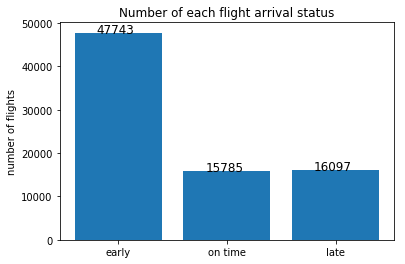

In [6]:
df_grouped = df.groupby(by=['Status']).count()
df_grouped = df_grouped['Unnamed: 0']
status = ('early','on time','late')
plt.bar(status,df_grouped[:])
plt.ylabel("number of flights")
plt.title('Number of each flight arrival status')
for i in range(len(df_grouped[:])):
    plt.text(x = i-0.2, y = df_grouped[i], s = df_grouped[i], size = 12)
    
    print("the percentage of", status[i], "fligtis",df_grouped[i]/sum(df_grouped)*100, '%')


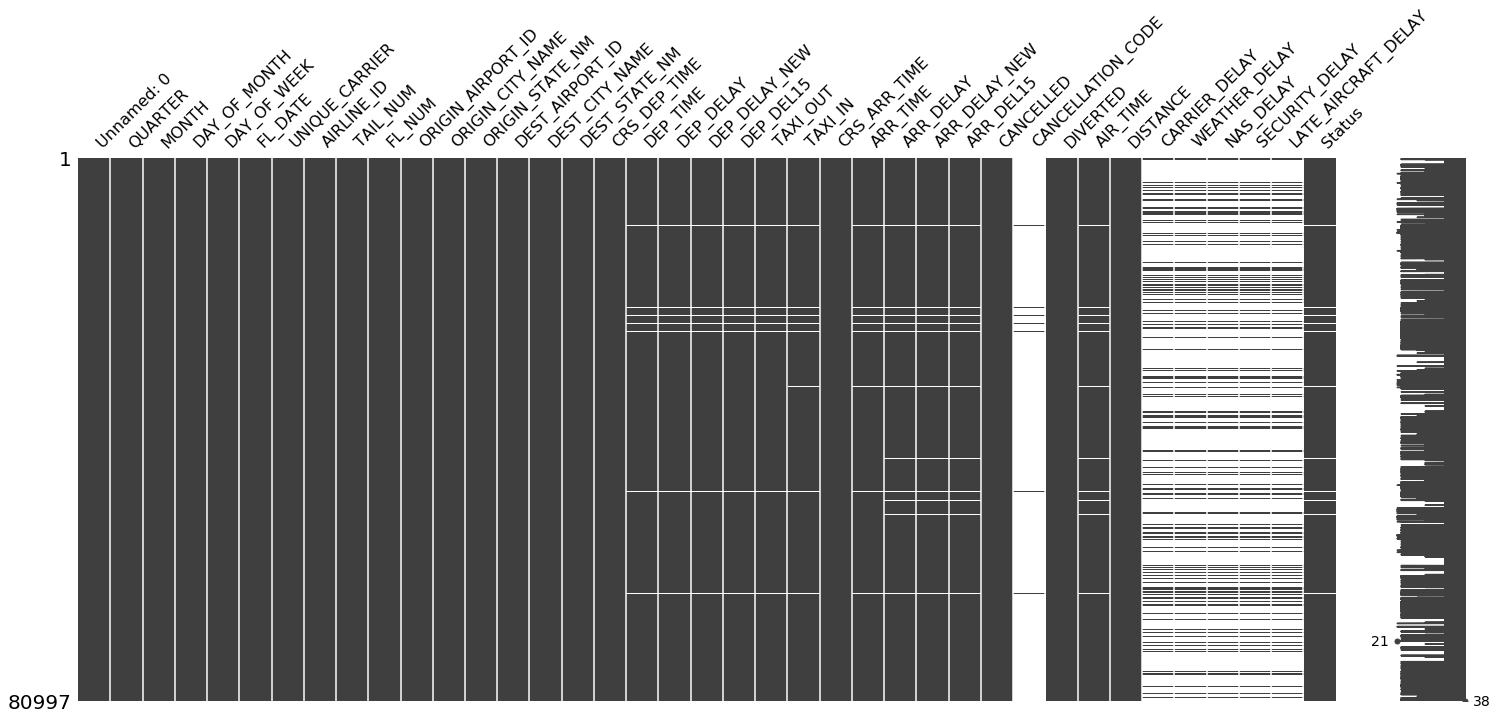

In [7]:
#This code was adopted from your notebooks
mn.matrix(df.sort_values(by=["Unnamed: 0",]))

#The code is from the class code, we modified the sorted valus inside the bracket.

Take out the canceled flight

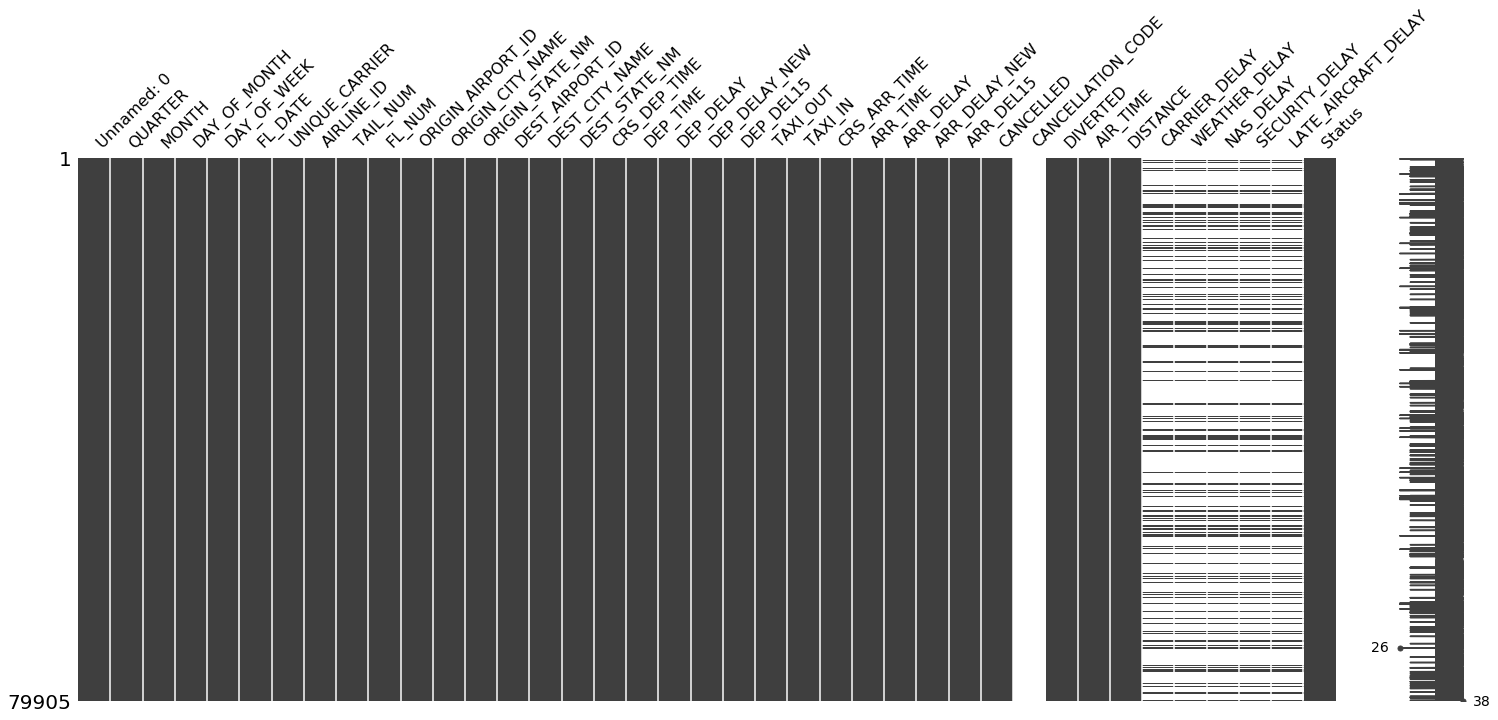

In [8]:
df_uncancelled = df[df.CANCELLED != 1]
mn.matrix(df_uncancelled.sort_values(by=["Unnamed: 0",]))

As we explained in the lab 1, the cancellation code is useless since we are focusing on the uncancelled flight. Thus, we drop the cancellation_code. Also, Due to the industry practice of 15 minutes of more delay is considered as flight delay, the majority of data are empty under columns CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, and LATE_AIRCRAFT_DELAY. These data are determined to be left alone, neither to be imputed nor eliminated.

In [9]:
df_uncancelled = df_uncancelled.drop(['CANCELLATION_CODE'],axis = 1)


We get rid of the Tail number (TAIL_NUM) though certain delay may caused by defected airplanes (they may purhcase new planes or destroy these old planes). 

We drop the Flight number (FL_NUM) because flight number may change by certain period. We get rid of flight date (FL_DATE) because it is a duplicated info in our table data. 

Since we are keeping the carrrier name, we drop the airline ID column (AIRLINE_ID). 

We get rid of all delay info except the depature delay(CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, ARR_DELAY, ARR_DELAY_NEW, ARR_DEL15) becuase the machine can easily tell that the flight is clasified as a delay once there is a positive input on these delay, and anything associates with arrival delay is summarized udner status.

We drop the column 'Quarter' (QUARTER) since 'Month' is giving us more information.

We drop the column 'Origin Airport ID' (ORIGIN_AIRPORT_ID), the column 'Origin state name' (ORIGIN_STATE_NM), the column 'Destination Airport ID' (DEST_AIRPORT_ID), the column 'Destination state name' (DEST_STATE_NM).

Since we do not have that much information about taxis, we drop column "Taxi in" and "Taxi out" (TAXI_OUT, TAXI_IN).

We drop (CANCELLED) and (DIVERTED) since they do not affect the arrival delay we try to classify.

We drop (DEP_DELAY), (DEP_DELAY_NEW), and (DEP_DEL15) since we cannot have these information before we sell the ticket.

We get rid of (DEP_TIME) and (ARR_TIME) since we cannot tell the actual departure and arrival time when we sell the ticket.

(Unnamed: 0) is useless so we drop it.

In [10]:
df_uncancelled = df_uncancelled.drop(['TAIL_NUM','FL_NUM','FL_DATE','AIRLINE_ID','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY'
                                     ,'SECURITY_DELAY','LATE_AIRCRAFT_DELAY','ARR_DELAY','ARR_DELAY_NEW','ARR_DEL15','ORIGIN_AIRPORT_ID'
                                      , 'ORIGIN_STATE_NM','DEST_AIRPORT_ID','DEST_STATE_NM', 'QUARTER','TAXI_OUT','TAXI_IN','CANCELLED'
                                     ,'DIVERTED', 'DEP_DELAY_NEW', 'DEP_DEL15','DEP_DELAY', 'DEP_TIME','ARR_TIME','Unnamed: 0'],axis = 1)


By doing some feature engineering, since spped can capture both the distance and air time features. Thus, we create a variable called "Speed", and drop (DISTANCE) and (AIRTIME).

In [11]:
df_uncancelled['SPEED'] = df_uncancelled['DISTANCE']/df_uncancelled['AIR_TIME']*60
df_uncancelled =  df_uncancelled.drop(['DISTANCE', 'AIR_TIME'], axis = 1)

In [12]:
df_uncancelled

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,CRS_ARR_TIME,Status,SPEED
0,1,18,3,AS,"Seattle, WA","Austin, TX",2310,503,early,491.666667
1,1,18,3,AS,"Portland, OR","Dallas/Fort Worth, TX",950,1530,on_time,482.388060
2,1,18,3,AS,"Dallas/Fort Worth, TX","Seattle, WA",1315,1538,early,446.636771
3,1,18,3,AS,"Dallas/Fort Worth, TX","Portland, OR",1630,1841,early,436.756757
4,1,18,3,AS,"San Antonio, TX","Seattle, WA",1840,2105,early,464.803493
5,1,18,3,AS,"Seattle, WA","Dallas/Fort Worth, TX",630,1209,on_time,469.811321
6,1,18,3,AS,"Seattle, WA","Dallas/Fort Worth, TX",2350,534,on_time,469.811321
7,1,18,3,AS,"Seattle, WA","Dallas/Fort Worth, TX",1310,1852,late,488.235294
8,1,18,3,AS,"Dallas/Fort Worth, TX","Seattle, WA",820,1043,early,452.727273
9,1,18,3,AS,"Dallas/Fort Worth, TX","Seattle, WA",1955,2216,early,469.811321


In [13]:
MONTH = pd.get_dummies(df_uncancelled['MONTH'])
DAY_OF_MONTH = pd.get_dummies(df_uncancelled['DAY_OF_MONTH'])
DAY_OF_WEEK = pd.get_dummies(df_uncancelled['DAY_OF_WEEK'])
UNIQUE_CARRIER = pd.get_dummies(df_uncancelled['UNIQUE_CARRIER'])
ORIGIN_CITY_NAME = pd.get_dummies(df_uncancelled['ORIGIN_CITY_NAME'])
DEST_CITY_NAME = pd.get_dummies(df_uncancelled['DEST_CITY_NAME'])
df_clean = pd.concat([MONTH, DAY_OF_MONTH, DAY_OF_WEEK, UNIQUE_CARRIER, ORIGIN_CITY_NAME, DEST_CITY_NAME, 
                     df_uncancelled['CRS_DEP_TIME'],df_uncancelled['CRS_ARR_TIME'],df_uncancelled['SPEED'], df_uncancelled['Status']], axis = 1)
df_clean


,1,1,2,3,4,5,6,7,8,9,...,"Valparaiso, FL","Waco, TX","Washington, DC","West Palm Beach/Palm Beach, FL","Wichita Falls, TX","Wichita, KS",CRS_DEP_TIME,CRS_ARR_TIME,SPEED,Status
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2310,503,491.666667,early
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,950,1530,482.388060,on_time
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1315,1538,446.636771,early
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1630,1841,436.756757,early
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1840,2105,464.803493,early
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,630,1209,469.811321,on_time
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2350,534,469.811321,on_time
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1310,1852,488.235294,late
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,820,1043,452.727273,early
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1955,2216,469.811321,early


Convert time to minutes (so it becomes continuous).

%%time
for i in df_clean['CRS_ARR_TIME']:
    if len(str(i)) <=2:
        df_clean["CRS_ARR_TIME"] = df_clean["CRS_ARR_TIME"].replace(i,str(i))
    if len(str(i)) == 3:
        df_clean["CRS_ARR_TIME"]  = df_clean['CRS_ARR_TIME'].replace(i,str(int(str(i)[0])*60 + int(str(i)[1])*10 + int(str(i)[2])))
    if len(str(i)) == 4:
        df_clean["CRS_ARR_TIME"]  = df_clean['CRS_ARR_TIME'].replace(i,str(int(str(i)[0])*10*60 + int(str(i)[1]) * 60 + int(str(i)[2]) * 10 + int(str(i)[3])))

%%time
for i in df_clean['CRS_DEP_TIME']:
    if len(str(i)) <=2:
        df_clean["CRS_DEP_TIME"] = df_clean["CRS_DEP_TIME"].replace(i,str(i))
    if len(str(i)) == 3:
        df_clean["CRS_DEP_TIME"]  = df_clean['CRS_DEP_TIME'].replace(i,str(int(str(i)[0])*60 + int(str(i)[1])*10 + int(str(i)[2])))
    if len(str(i)) == 4:
        df_clean["CRS_DEP_TIME"]  = df_clean['CRS_DEP_TIME'].replace(i,str(int(str(i)[0])*10*60 + int(str(i)[1]) * 60 + int(str(i)[2]) * 10 + int(str(i)[3])))

# Convert the data type back to int
df_clean['CRS_ARR_TIME'] = df_clean['CRS_ARR_TIME'].astype('int64')
df_clean['CRS_DEP_TIME'] = df_clean['CRS_DEP_TIME'].astype('int64')

In [14]:
# Output the pands datafram to csv
df_clean.to_csv("C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/df_clean",sep=",")

# The df_clean is the csv which the null value is already be taken out

#### Use this code to call the csv file
#df_clean = pd.read_csv("")

Before we split the dataset, let's check the null value.

In [15]:
print(df_clean.isnull().sum())

1                                   0
1                                   0
2                                   0
3                                   0
4                                   0
5                                   0
6                                   0
7                                   0
8                                   0
9                                   0
10                                  0
11                                  0
12                                  0
13                                  0
14                                  0
15                                  0
16                                  0
17                                  0
18                                  0
19                                  0
20                                  0
21                                  0
22                                  0
23                                  0
24                                  0
25                                  0
26          

Since 280 oberservation is less than 0.4% of our selecting data, we choose to eliminate these missing value observation.

In [16]:
df_clean = df_clean[df_clean['SPEED'].notnull()]
print(df_clean.isnull().sum())

1                                 0
1                                 0
2                                 0
3                                 0
4                                 0
5                                 0
6                                 0
7                                 0
8                                 0
9                                 0
10                                0
11                                0
12                                0
13                                0
14                                0
15                                0
16                                0
17                                0
18                                0
19                                0
20                                0
21                                0
22                                0
23                                0
24                                0
25                                0
26                                0
27                          

Normalize some features

In [17]:
df_clean['SPEED'] = (df_clean['SPEED']-df_clean['SPEED'].mean()) / df_clean['SPEED'].std()

Split the data set to X (all explanatory variables) and y (the response variable, which is the Status in our project )

In [18]:
y = df_clean[['Status']]
y = y.replace(['early','on_time','late'],[0,1,2])
X = df_clean.drop(['Status'], axis=1)


Testing the code by only select the frist 1000 obs.

In [19]:
X = X.loc[0:1010]
y = y.loc[0:1010]

In [20]:
y=np.array(y)
y = np.hstack(y)
y = y.astype('int32')
X = np.array(X)

## Spliting the Training and Testing data (80% vs 20%)

#### In order to compare how good the 8 to 2 ratio is, we implement the code we went over through during the lecture time, and use different ratio to compare the accuracy score (the higher the better).

### Here we start implementing the code from lecture_05 to our project

The foundamental structure for Logistric Regression, which is a binary logistic. One vs All is like a loop of class[i] vs non-class[i]

The objective function that we defined was :


$$ l(\mathbf{w}) = \sum_i \left( y^{(i)} \ln [g(\mathbf{w}^T \mathbf{x}^{(i)})] + (1-y^{(i)}) (\ln [1 - g(\mathbf{w}^T \mathbf{x}^{(i)})])  \right)  $$

The main result is the *update equation* for **binary logistic regression**. The update equation for logistic regression can be written as:

$$ \underbrace{w_j}_{\text{new value}} \leftarrow \underbrace{w_j}_{\text{old value}} + \eta \underbrace{\sum_{i=1}^M (y^{(i)}-g(\mathbf{w}^T\mathbf{x}^{(i)}))x^{(i)}_j}_{\text{gradient}} $$

where $\eta$ is the learning rate, $g(\cdot)$ is the sigmoid function, $y^{(i)}$ is an instance of the target, $\hat{y}^{(i)}$ is an instance of the prediction (for the current value of $w$), and $x^{(i)}_j$ is the $i^{th}$ instance of the input with the $j^{th}$ feature (that is, the feature in row $i$ and column $j$). The process is iterative, so we must calculate the gradient every time $w$ is updated. We derived this for the simple gradient ascent approach, where we calculate the gradient and step in the direction of steepest ascent. 

We can simplify this calculation a bit using matrix algebra to solve for the entire vector $w$:

$$ \mathbf{w} \leftarrow \mathbf{w} + \eta \sum_{i=1}^M (y^{(i)}-g(\mathbf{w}^T\mathbf{x}^{(i)}))\mathbf{x}^{(i)} $$

where we simply multiply the entire $\mathbf{x}^{(i)}$ instance by the scalar difference, $y^{(i)}-\widehat{y}^{(i)}$. 

___

In [21]:
import numpy as np
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # save eta and iterations to the self. name space
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private:
    @staticmethod #Decorator: wrapper for any function after it, which means you do not need access to the class
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term, the column of 1, does not needed for SKlearn
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X # check whether the bias term has been added
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
                                           #we may need to change it depends on the case (one vs. all)

In [22]:
# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self): # overwrite the _str_ function
        if(hasattr(self,'w_')): # double check whether the w_ has been added to the name space
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y): # Update the weight each time, which updates the gradient
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y): #zip(X,y) mean go row by row, and matach them up
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_bias=False))*xi # it already added the bias term
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y)) # return the mean of the weight
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 


Vectorized Programming, which helps reducing the running time.



In [23]:
# now lets do some vectorized coding
import numpy as np
from scipy.special import expit

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference #.revel() get rid of un-needed shape (shape = 1)
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)


One vs All

In [24]:
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem # when y = y unique, it goes to 1
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row

### L2 Regularized Logistic Regression (with steepest descent/batch method) with L2 regularization



Can we control these boundaries?
Whenever we let the weights become large, that means we are allowing the sigmoid finction to also become more vertical (see image below). Large values of $w$ correspond to the blue line. Smaller values of $w$ correspond to the red line. So, in order to help prevent overfitting, we can add in a term into our optimization that keeps the weights small.

<img src="https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/51007/versions/2/screenshot.jpg" alt="Drawing" width= 300/>

Let's introduce another parameter in the objective function called the L2-Norm. The idea here is that we want to keep the values of the weights relatively small. This helps to control overfitting to the data and thus . We are changing our objective function by adding in a new summation of the weights:

$$ l(\mathbf{w})_{reg} = l(\mathbf{w})_{old} - C\cdot\sum_j w_j^2 $$

This means the gradient will be updated as follows:

$$ \underbrace{w_j}_{\text{new value}} \leftarrow \underbrace{w_j}_{\text{old value}} + \eta \underbrace{\left[\left(\sum_{i=1}^M (y^{(i)}-g(\mathbf{w}^T\mathbf{x}^{(i)}))x^{(i)}_j\right) - C \cdot 2w_j \right]}_{\text{new gradient}}$$

Which is the same as:
$$ \mathbf{w} \leftarrow \mathbf{w} + \eta \left[\underbrace{\nabla l(\mathbf{w})_{old}}_{\text{old gradient}} - C \cdot 2\mathbf{w} \right]$$

Its fairly easy to implement because we just need to add to the existing gradient function.

In [25]:
class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, eta, iterations=20, C=0.001):
        self.eta = eta
        self.iters = iterations
        self.C = C
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        
        # add in regularization (to all except bias term)
        gradient[1:] += -2 * self.w_[1:] * self.C # This is for L2 regularization
        return gradient
        
        


In [26]:
# now redefine the Logistic Regression Function where needed
class RegularizedLogisticRegression(LogisticRegression):
    def __init__(self, eta, iterations=20, C=0.001):
        self.eta = eta
        self.iters = iterations
        self.C = C
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T



#### Testing the different ratio

In [27]:
from sklearn.model_selection import ShuffleSplit

    
# to use the cross validation object in scikit learn, we need to grab an instance
#   of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 1 # The number of split
num_instances = len(y)
cv_object = ShuffleSplit(
                         n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)


from sklearn import metrics as mt
from sklearn.metrics import accuracy_score
# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = RegularizedLogisticRegression(eta=0.1,iterations=2000) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

for i in range(18):
    num_instances = len(y)
    cv_object = ShuffleSplit(
                         n_splits=1,
                         test_size  = 0.1+i*0.05)
    iter_num=0
    for train_indices, test_indices in cv_object.split(X,y): 

        X_train = X[train_indices]
        y_train = y[train_indices]
    
        X_test = X[test_indices]
        y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
        lr_clf.fit(X_train,y_train)  # train object
        y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
        acc = mt.accuracy_score(y_test,y_hat)
        acc01 = mt.accuracy_score(y_train,lr_clf.predict(X_train))
        conf = mt.confusion_matrix(y_test,y_hat)
        print("====Test Ratio",1-(0.1+i*0.05),"vs.",0.1+i*0.05," ====")
        print("accuracy on testing", acc )
        print("accuracy on training", acc01)
        #print("confusion matrix\n",conf)
        iter_num+=1

So from this for loop result with 0.05 increment on tesing data percentage, we can see 80/20 is not the optimum selection for spliting the data since the accuracy on testing is not close to accuracy on training. Anyway, we use 80/20 for this lab

In [28]:
# Data spliting
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score
num_cv_iterations = 1
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size  = 0.2)

lr_clf = RegularizedLogisticRegression(eta=0.1,iterations=2000, C=0.01) 

iter_num=0

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)

    print("accuracy", acc )
    iter_num+=1
    


accuracy 0.7810945273631841


### Here is the implmentation of your lecture_06 code for optimization

## Determination on the method and regularization

We first set up the template for all methods with new parameters and if/else for choosing different regularization.


In [29]:
import numpy as np
class BinaryLogisticRegressionBase_new:
    # private:
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
        # save eta and iterations to the self. name space
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private:
    @staticmethod #Decorator: wrapper for any function after it, which means you do not need access to the class
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term, the column of 1, does not needed for SKlearn
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X # check whether the bias term has been added
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
                                           #we may need to change it depends on the case (one vs. all)


In [30]:
# from last time, our logistic regression algorithm is given by (including everything we previously had):
class BinaryLogisticRegression_new(BinaryLogisticRegressionBase_new):
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

In [31]:
# now lets do some vectorized coding
class VectorBinaryLogisticRegression_new(BinaryLogisticRegression_new):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference #.revel() get rid of un-needed shape (shape = 1)
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)


In [32]:
class LogisticRegression_new:
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem # when y = y unique, it goes to 1
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression_01(self.eta,self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row

In [141]:
class RegularizedBinaryLogisticRegression_new(VectorBinaryLogisticRegression_new):    
    # extend previous class to change functionality
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        
        # add in regularization (to all except bias term)
        if self.norm == 'L1':
            gradient[1:] += -np.sign(self.w_[1:])*self.C
        elif self.norm == 'L2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient
        
        
        
# now redefine the Logistic Regression Function where needed
class RegularizedLogisticRegression_new(LogisticRegression_new):
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = RegularizedBinaryLogisticRegression_new(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C,
                                                      norm=self.norm
                                                        )
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

In [143]:
class StochasticBinaryLogisticRegression_new(VectorBinaryLogisticRegression_new):
    # extend init functions
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        if self.norm == 'L1':
            gradient[1:] += -np.sign(self.w_[1:])*self.C
        elif self.norm == 'L2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient

    
# now redefine the Logistic Regression Function where needed
class StochasticLogisticRegression_new(LogisticRegression_new):
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = StochasticBinaryLogisticRegression_new(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C,
                                                      norm=self.norm)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

In [160]:
from numpy.linalg import pinv
class HessianBinaryLogisticRegression_new(VectorBinaryLogisticRegression_new):
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
        
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        if self.norm == "L1":
            hessian = X.T @ np.diag(g*(1-g)) @ X
            ydiff = y-g # get y difference
            gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
            gradient = gradient.reshape(self.w_.shape)
            gradient[1:] += -np.sign(self.w_[1:])*self.C
        elif self.norm == "L2":
            hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian
            ydiff = y-g # get y difference
            gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
            gradient = gradient.reshape(self.w_.shape)
            gradient[1:] += -2 * self.w_[1:]* self.C

        
        return pinv(hessian) @ gradient
    

# now redefine the Logistic Regression Function where needed
class HessianLogisticRegression_new(LogisticRegression_new):
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
        
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = HessianBinaryLogisticRegression_new(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C, norm=self.norm)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

A test code is showing below

In [170]:
#RegularizedLogisticRegression_new for calling batch method
#StochasticLogisticRegression_new for calling GSD method
#HessianBinaryLogisticRegression_new for calling newton method

method = "newton" # input the method we want to add here
eta = 0.1        # input the step 
iterations = 10 # number of iterations
C = 0.05    # parameter for C, C = 0 means no regularization
norm = "L1"       # regularization method


if method == "batch":
    our_method = RegularizedLogisticRegression_new(eta,iterations,C,norm) 
    our_method.fit(X_train,y_train)
    yhat_our_method_train = our_method.predict(X_train)
    print("The accuracy for batch method is ", accuracy_score(y_train,yhat_our_method_train))
elif method == "stochastic":
    our_method = StochasticLogisticRegression_new(eta,iterations,C,norm)
    our_method.fit(X_train,y_train)
    yhat_our_method_train = our_method.predict(X_train)
    print("The accuracy for GSD method is: ",accuracy_score(y_train,yhat_our_method_train))
elif method == "newton":
    our_method = HessianLogisticRegression_new(eta,iterations,C,norm)
    our_method.fit(X_train,y_train)
    yhat_our_method_train = our_method.predict(X_train)
    print("The accuracy for newton method: ",accuracy_score(y_train,yhat_our_method_train))
else:
    print("Invalid method")


The accuracy for newton method:  0.8196517412935324


Once we set up the template for all optimization methods and regularization terms, we start ploting the accuracy score vesus different C parameter value for each combination (6 in total)

In [163]:
%%time
C=0.01
eta = 0.1         
iterations = 100     
norm = "L2"       
batch_accuracy = []
batch_C = []
for i in range(100):
    our_method = RegularizedLogisticRegression_new(eta,iterations,C,norm) 
    our_method.fit(X_train,y_train)
    yhat_our_method_train = our_method.predict(X_train)
    accuracy_result = accuracy_score(y_train,yhat_our_method_train)
    batch_accuracy = batch_accuracy+[accuracy_result]
    batch_C += [C]
    C = C + 0.01

Wall time: 40.4 s


In [164]:
C=0.01
eta = 0.1         
iterations = 100      
norm = "L1"       
batch_accuracy01 = []
batch_C01 = []
for i in range(100):
    our_method = RegularizedLogisticRegression_new(eta,iterations,C,norm) 
    our_method.fit(X_train,y_train)
    yhat_our_method_train = our_method.predict(X_train)
    accuracy_result = accuracy_score(y_train,yhat_our_method_train)
    batch_accuracy01 +=[accuracy_result]
    batch_C01 += [C]
    C = C + 0.01


In [165]:
C=0.01
eta = 0.1         
iterations = 100         
norm = "L2"       
gsd_accuracy = []
gsd_C = []
for i in range(100):
    our_method = StochasticLogisticRegression_new(eta,iterations,C,norm) 
    our_method.fit(X_train,y_train)
    yhat_our_method_train = our_method.predict(X_train)
    accuracy_result = accuracy_score(y_train,yhat_our_method_train)
    gsd_accuracy +=[accuracy_result]
    gsd_C += [C]
    C = C + 0.01


In [166]:
eta = 0.1         
iterations = 100  
norm = "L1"       
gsd_accuracy01 = []
gsd_C01 = []
for i in range(100):
    our_method = StochasticLogisticRegression_new(eta,iterations,C,norm) 
    our_method.fit(X_train,y_train)
    yhat_our_method_train = our_method.predict(X_train)
    accuracy_result = accuracy_score(y_train,yhat_our_method_train)
    gsd_accuracy01 +=[accuracy_result]
    gsd_C01 += [C]
    C = C + 0.01



In [169]:
%%time
eta = 0.1         
iterations = 10  
C = 0.01         
norm = "L2"       
newton_accuracy = []
newton_C = []
for i in range(100):
    our_method = HessianLogisticRegression_new(eta,iterations,C,norm) 
    our_method.fit(X_train,y_train)
    yhat_our_method_train = our_method.predict(X_train)
    accuracy_result = accuracy_score(y_train,yhat_our_method_train)
    newton_accuracy +=[accuracy_result]
    newton_C += [C]
    C = C + 0.01


Wall time: 1min 9s


In [171]:
eta = 0.1         
iterations = 10 
C = 0.01         
norm = "L1"       
newton_accuracy01 = []
newton_C01 = []
for i in range(100):
    our_method = HessianLogisticRegression_new(eta,iterations,C,norm) 
    our_method.fit(X_train,y_train)
    yhat_our_method_train = our_method.predict(X_train)
    accuracy_result = accuracy_score(y_train,yhat_our_method_train)
    newton_accuracy01 +=[accuracy_result]
    newton_C01 += [C]
    C = C + 0.01


Text(0.5,0,'C parameter')

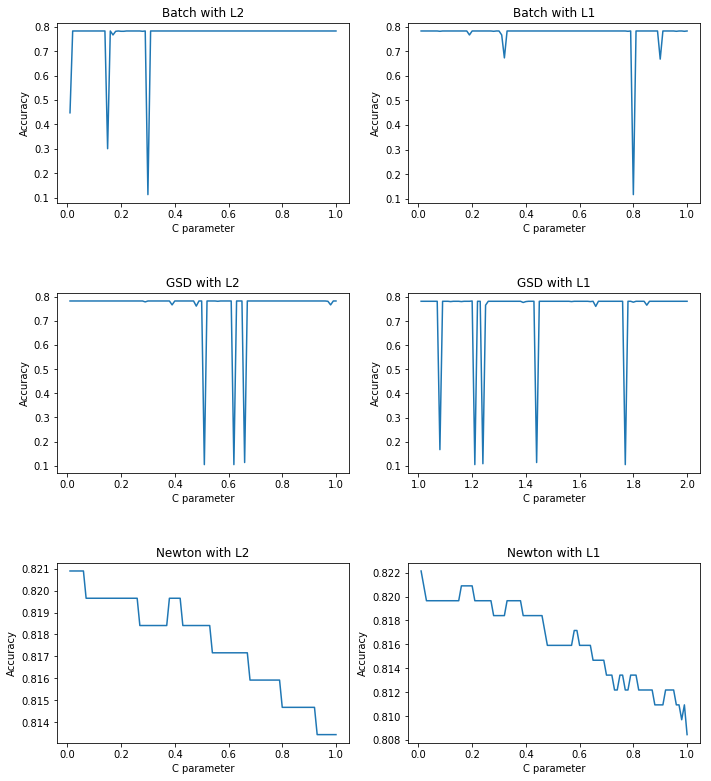

In [172]:
import matplotlib.pyplot as plt
plt.subplots_adjust(bottom=0, left=.01, right=1.5, top=2.5, hspace=.5)
plt.subplot(3,2,1)
plt.plot(batch_C,batch_accuracy)
plt.title("Batch with L2")
plt.ylabel("Accuracy")
plt.xlabel("C parameter")

plt.subplot(3,2,2)
plt.plot(batch_C01, batch_accuracy01)
plt.title("Batch with L1")
plt.ylabel("Accuracy")
plt.xlabel("C parameter")

plt.subplot(3,2,3)
plt.plot(gsd_C,gsd_accuracy)
plt.title("GSD with L2")
plt.ylabel("Accuracy")
plt.xlabel("C parameter")

plt.subplot(3,2,4)
plt.plot(gsd_C01, gsd_accuracy01)
plt.title("GSD with L1")
plt.ylabel("Accuracy")
plt.xlabel("C parameter")

plt.subplot(3,2,5)
plt.plot(newton_C,newton_accuracy)
plt.title("Newton with L2")
plt.ylabel("Accuracy")
plt.xlabel("C parameter")

plt.subplot(3,2,6)
plt.plot(newton_C01, newton_accuracy01)
plt.title("Newton with L1")
plt.ylabel("Accuracy")
plt.xlabel("C parameter")

From the plot gallery, the Newton method with L1 regularization has the most stable accuracy score.

In [173]:
print("The maximum Batch with L2:", max(batch_accuracy))
print("The maximum Batch with L1:", max(batch_accuracy01))
print("The maximum GSD with L2:", max(gsd_accuracy))
print("The maximum GSD with L1:", max(gsd_accuracy01))
print("The maximum Newton with L2:", max(newton_accuracy))
print("The maximum Newton with L1:", max(newton_accuracy01))

The maximum Batch with L2: 0.7823383084577115
The maximum Batch with L1: 0.7823383084577115
The maximum GSD with L2: 0.7823383084577115
The maximum GSD with L1: 0.7835820895522388
The maximum Newton with L2: 0.8208955223880597
The maximum Newton with L1: 0.822139303482587


In [174]:
for i,j in enumerate(newton_accuracy):
    if j == max(newton_accuracy):
        print(batch_C01[i])
        break

0.01


Base on the comparision, newton method performs the best (there is not that much difference between L1 and L2 regularization). 

We believe C =0.01 gives the best performance

## Compare with SKlearn

##### Sklearn module for logistic regression

SKlearn uses solver = "liblinear" to optimazed its result, which is the default option

reference:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [176]:
%%time
# in order to get no regulazation, input a large C value with l2 regularization
# solver = "bfgs" for newton


from sklearn.linear_model import LogisticRegression



clf = LogisticRegression(penalty = "l2", C=0.01,solver="newton-cg").fit(X_train, y_train)
yhat_01 = clf.predict(X_train)
print(accuracy_score(y_train,yhat_01))

0.7823383084577115
Wall time: 458 ms


In [178]:
%%time
norm="L2"
eta = 0.1         
iterations = 10 
C = 0.01 
our_method = HessianLogisticRegression_new(eta,iterations,C,norm) 
our_method.fit(X_train,y_train)
yhat_our_method_train = our_method.predict(X_train)
accuracy_result = accuracy_score(y_train,yhat_our_method_train)
print(accuracy_result)

0.8208955223880597
Wall time: 663 ms


Base on the train dataset, our code beat sklean method for about 4% accuracy score with 50% more running time.


## Test data with both implementations

In [188]:
import time

In [206]:
time_int = time.clock()
clf = LogisticRegression(penalty = "l2", C=0.01,solver="newton-cg").fit(X_test, y_test)
yhat_01 = clf.predict(X_test)
print(accuracy_score(y_test,yhat_01))
time_final =time.clock()
time01 = time_final-time_int
print(time01)

0.7810945273631841
0.2194483687162574


In [209]:
time_int = time.clock()
norm="L2"
eta = 0.1         
iterations = 10 
C = 0.01 
our_method = RegularizedLogisticRegression_new(eta,iterations,C,norm) 
our_method.fit(X_test,y_test)
yhat_our_method_train = our_method.predict(X_test)
accuracy_result01 = accuracy_score(y_test,yhat_our_method_train)
print(accuracy_result)
time_final =time.clock()
time02 = time_final-time_int
print(time02)

0.7810945273631841
0.006683638479444198


Text(0.5,0,'Coding')

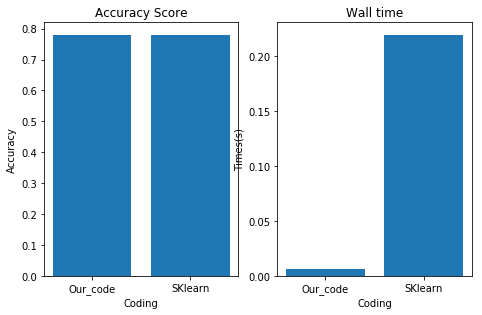

In [224]:
plt.subplots_adjust(bottom=0, left=.01, right=1 )

plt.subplot(121)
result = [0.7810945273631841,0.7810945273631841]
name = ["Our_code","SKlearn"]
plt.bar(name, result)
plt.title("Accuracy Score")
plt.ylabel("Accuracy")
plt.xlabel("Coding")

plt.subplot(122)
result = [time02,time01]
name = ["Our_code","SKlearn"]
plt.bar(name, result)
plt.title("Wall time")
plt.ylabel("Times(s)")
plt.xlabel("Coding")


Our code and SKlearn generates the same accuracy on the test-set. However, our code is running faster（way faster!) than the SKlearn. Thus, we deploy our code

## Exceptional work

In this part, we use the Mean Square Error to be out objective function. Thus, instead of determine the maximum of the log likelihood function, we need to minimize the MSE function, which means we need to "Add" the regularization term.

In [272]:
from numpy.linalg import pinv
class MSEBinaryLogisticRegression_new(VectorBinaryLogisticRegression_new):
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
        
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        
        if self.norm == 'L1':
            hessian = (-2/len(y))*X.T@np.diag(y*g-3*y*g**2-g**3-2*y*g**2+2*y*g**3-3*g**4)@X
            ydiff = y-g # get y difference
            gradient = np.mean(X * ydiff[:,np.newaxis]*(1-g)[:,np.newaxis]*g[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
            gradient = gradient.reshape(self.w_.shape)
            gradient[1:] += np.sign(self.w_[1:])*self.C
        elif self.norm == 'L2':
            hessian = (-2/len(y))*X.T@np.diag(y*g-3*y*g**2-g**3-2*y*g**2+2*y*g**3-3*g**4)@X - 2 * self.C # calculate the hessian
            ydiff = y-g # get y difference
            gradient = np.sum(X * ydiff[:,np.newaxis]*(1-g)[:,np.newaxis]*g[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
            gradient = gradient.reshape(self.w_.shape)
            gradient[1:] += 2 * self.w_[1:]* self.C
        
        return pinv(hessian) @ gradient

# now redefine the Logistic Regression Function where needed
class MSELogisticRegression_new(LogisticRegression_new):
    def __init__(self, eta, iterations=20,C=0.001, norm="L1"):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
        
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = MSEBinaryLogisticRegression_new(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C, norm=self.norm)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

In [275]:
%%time
norm="L1"
eta = 0.1         
iterations = 1
C = 0.0 
our_method = MSELogisticRegression_new(eta,iterations,C,norm) 
our_method.fit(X_test,y_test)
yhat_our_method_train = our_method.predict(X_test)
accuracy_result = accuracy_score(y_test,yhat_our_method_train)
print(accuracy_result)

0.8656716417910447
Wall time: 50.8 ms


In [276]:
%%time
norm="L2"
eta = 0.1         
iterations = 1
C = 0.0 
our_method = MSELogisticRegression_new(eta,iterations,C,norm) 
our_method.fit(X_test,y_test)
yhat_our_method_train = our_method.predict(X_test)
accuracy_result = accuracy_score(y_test,yhat_our_method_train)
print(accuracy_result)

0.8656716417910447
Wall time: 41.9 ms


In [273]:
%%time
norm="L1"
eta = 0.1         
iterations = 1
C = 0.01 
our_method = MSELogisticRegression_new(eta,iterations,C,norm) 
our_method.fit(X_test,y_test)
yhat_our_method_train = our_method.predict(X_test)
accuracy_result = accuracy_score(y_test,yhat_our_method_train)
print(accuracy_result)

0.8656716417910447
Wall time: 54.9 ms


In [274]:
%%time
norm="L2"
eta = 0.1         
iterations = 1
C = 0.01 
our_method = MSELogisticRegression_new(eta,iterations,C,norm) 
our_method.fit(X_test,y_test)
yhat_our_method_train = our_method.predict(X_test)
accuracy_result = accuracy_score(y_test,yhat_our_method_train)
print(accuracy_result)

0.8656716417910447
Wall time: 45.9 ms
